**Normalisation** :
Process of scaling numerical data to a standard range, typically between 0 and 1, or transforming to have a mean of 0 and a standard deviation of 1. This process helps improve the performance of machine learning algorithms and ensures that all features contribute equally to the result.

Min-max method for Normalisation.


Data Cleaning : handling missing values, removing duplicates, correcting errors and ensuring consistency.

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('sample_data.csv')
print(df)

      Name   Age   Salary   Department
0    Alice  25.0  50000.0           HR
1      Bob  30.0      NaN  Engineering
2  Charlie  35.0  70000.0  Engineering
3    David   NaN  60000.0           HR
4      Eve  28.0  80000.0           HR
5    Frank  40.0  55000.0        Sales
6    Grace  50.0  85000.0        Sales
7     Hank  60.0  90000.0        Sales


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        8 non-null      object 
 1   Age         7 non-null      float64
 2   Salary      7 non-null      float64
 3   Department  8 non-null      object 
dtypes: float64(2), object(2)
memory usage: 384.0+ bytes


In [5]:
print(df.isnull().sum())

Name          0
Age           1
Salary        1
Department    0
dtype: int64


Removing rows with missing values

In [6]:
print(df.dropna())

      Name   Age   Salary   Department
0    Alice  25.0  50000.0           HR
2  Charlie  35.0  70000.0  Engineering
4      Eve  28.0  80000.0           HR
5    Frank  40.0  55000.0        Sales
6    Grace  50.0  85000.0        Sales
7     Hank  60.0  90000.0        Sales


Filling missing values

In [10]:
df_filled=df.fillna({
    'Age':df['Age'].mean(),
    'Salary': 89000
})
print(df_filled)

      Name        Age   Salary   Department
0    Alice  25.000000  50000.0           HR
1      Bob  30.000000  89000.0  Engineering
2  Charlie  35.000000  70000.0  Engineering
3    David  38.285714  60000.0           HR
4      Eve  28.000000  80000.0           HR
5    Frank  40.000000  55000.0        Sales
6    Grace  50.000000  85000.0        Sales
7     Hank  60.000000  90000.0        Sales


Forward fill method : value of previous row will be filled.

In [11]:
df_ffill= df.fillna(method='ffill')
print(df_ffill)

      Name   Age   Salary   Department
0    Alice  25.0  50000.0           HR
1      Bob  30.0  50000.0  Engineering
2  Charlie  35.0  70000.0  Engineering
3    David  35.0  60000.0           HR
4      Eve  28.0  80000.0           HR
5    Frank  40.0  55000.0        Sales
6    Grace  50.0  85000.0        Sales
7     Hank  60.0  90000.0        Sales


Backword Fill method

In [12]:
df_bfill=df.fillna(method='bfill')
print(df_bfill)

      Name   Age   Salary   Department
0    Alice  25.0  50000.0           HR
1      Bob  30.0  70000.0  Engineering
2  Charlie  35.0  70000.0  Engineering
3    David  28.0  60000.0           HR
4      Eve  28.0  80000.0           HR
5    Frank  40.0  55000.0        Sales
6    Grace  50.0  85000.0        Sales
7     Hank  60.0  90000.0        Sales


Removing Duplicates

In [16]:
#add duplicate rows for demonstration
# print(pd.concat([df,df.iloc[0:2]]))
df=pd.concat([df,df.iloc[[0]], df.iloc[[1]]], ignore_index=True)
print(df)

       Name   Age   Salary   Department
0     Alice  25.0  50000.0           HR
1       Bob  30.0      NaN  Engineering
2   Charlie  35.0  70000.0  Engineering
3     David   NaN  60000.0           HR
4       Eve  28.0  80000.0           HR
5     Frank  40.0  55000.0        Sales
6     Grace  50.0  85000.0        Sales
7      Hank  60.0  90000.0        Sales
8     Alice  25.0  50000.0           HR
9       Bob  30.0      NaN  Engineering
10    Alice  25.0  50000.0           HR
11      Bob  30.0      NaN  Engineering


In [17]:
#Remove Duplicate rows

df=df.drop_duplicates()
print(df)

      Name   Age   Salary   Department
0    Alice  25.0  50000.0           HR
1      Bob  30.0      NaN  Engineering
2  Charlie  35.0  70000.0  Engineering
3    David   NaN  60000.0           HR
4      Eve  28.0  80000.0           HR
5    Frank  40.0  55000.0        Sales
6    Grace  50.0  85000.0        Sales
7     Hank  60.0  90000.0        Sales


Replacing incorrect values

In [20]:
df_corrected=df.replace({'Department': {'HR' : "Human Resources",
                                        'Sales' : "Sales Department"}})
print(df_corrected)

      Name   Age   Salary        Department
0    Alice  25.0  50000.0   Human Resources
1      Bob  30.0      NaN       Engineering
2  Charlie  35.0  70000.0       Engineering
3    David   NaN  60000.0   Human Resources
4      Eve  28.0  80000.0   Human Resources
5    Frank  40.0  55000.0  Sales Department
6    Grace  50.0  85000.0  Sales Department
7     Hank  60.0  90000.0  Sales Department


Ensuring Consistency

In [23]:
print(df['Department'].str.lower())

0             hr
1    engineering
2    engineering
3             hr
4             hr
5          sales
6          sales
7          sales
Name: Department, dtype: object


# Min-Max Normalisation

*  Techinque to rescale the values of a feature to a fixed range, usually[0,1]

*  This is done by transforming each value in the feature such that it fits within the specified range

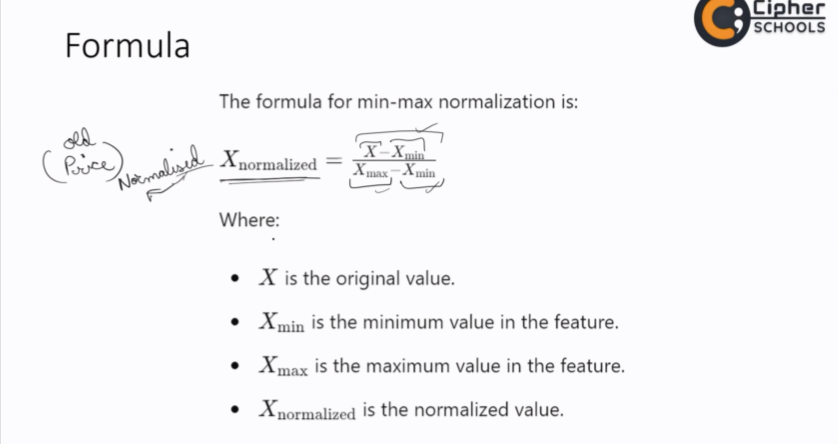



**Replace each value in the column with the normalized value**

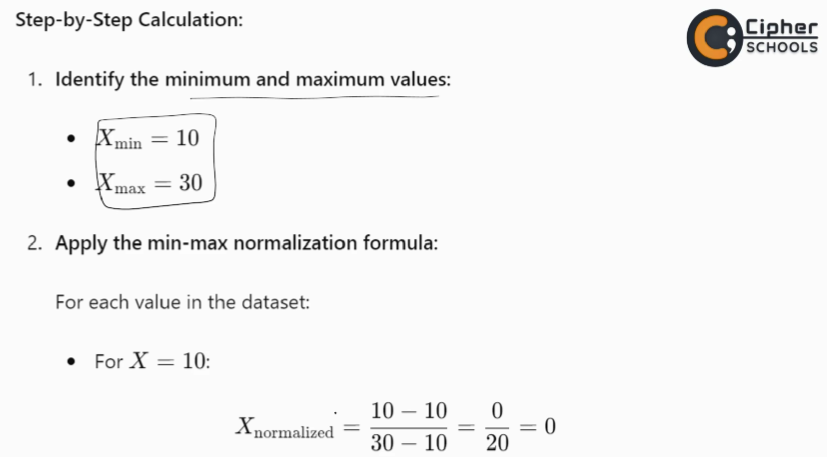

In [24]:
df_normalised=df.copy()
for i in ['Age','Salary']:
  df_normalised[i]=(df[i] - df[i].min())/(df[i].max()-df[i].min())
print("Original DataFrame: ")
print(df)
print("")
print("Normalised DataFrame: ")
print(df_normalised)

Original DataFrame: 
      Name   Age   Salary   Department
0    Alice  25.0  50000.0           HR
1      Bob  30.0      NaN  Engineering
2  Charlie  35.0  70000.0  Engineering
3    David   NaN  60000.0           HR
4      Eve  28.0  80000.0           HR
5    Frank  40.0  55000.0        Sales
6    Grace  50.0  85000.0        Sales
7     Hank  60.0  90000.0        Sales

Normalised DataFrame: 
      Name       Age  Salary   Department
0    Alice  0.000000   0.000           HR
1      Bob  0.142857     NaN  Engineering
2  Charlie  0.285714   0.500  Engineering
3    David       NaN   0.250           HR
4      Eve  0.085714   0.750           HR
5    Frank  0.428571   0.125        Sales
6    Grace  0.714286   0.875        Sales
7     Hank  1.000000   1.000        Sales


Advantages:

*  Ensures that all features contribute equally to the analysis.

*  Helps improve the performance of machine learning algorithms

*  Simplifies the interpretation of coefficients in linear models.

Disadvantages:

* Sensitive to outliers, as the range is determined by the minimum and maximum values.

* Not suitable for data with a non- linear distribution, as it can distort the original data distribution.